In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

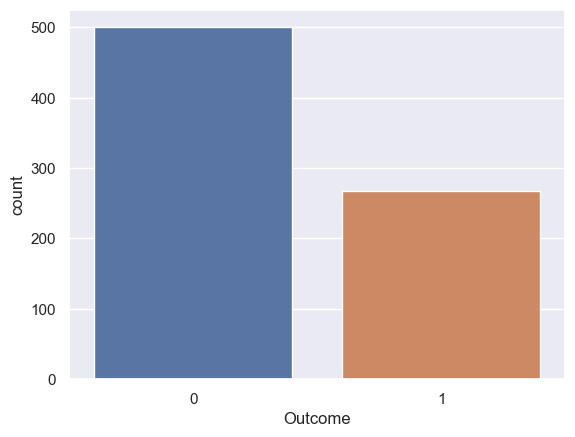

In [5]:
ax=sns.countplot(x=df["Outcome"], label="Count")
df["Outcome"].value_counts()
plt.show()

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

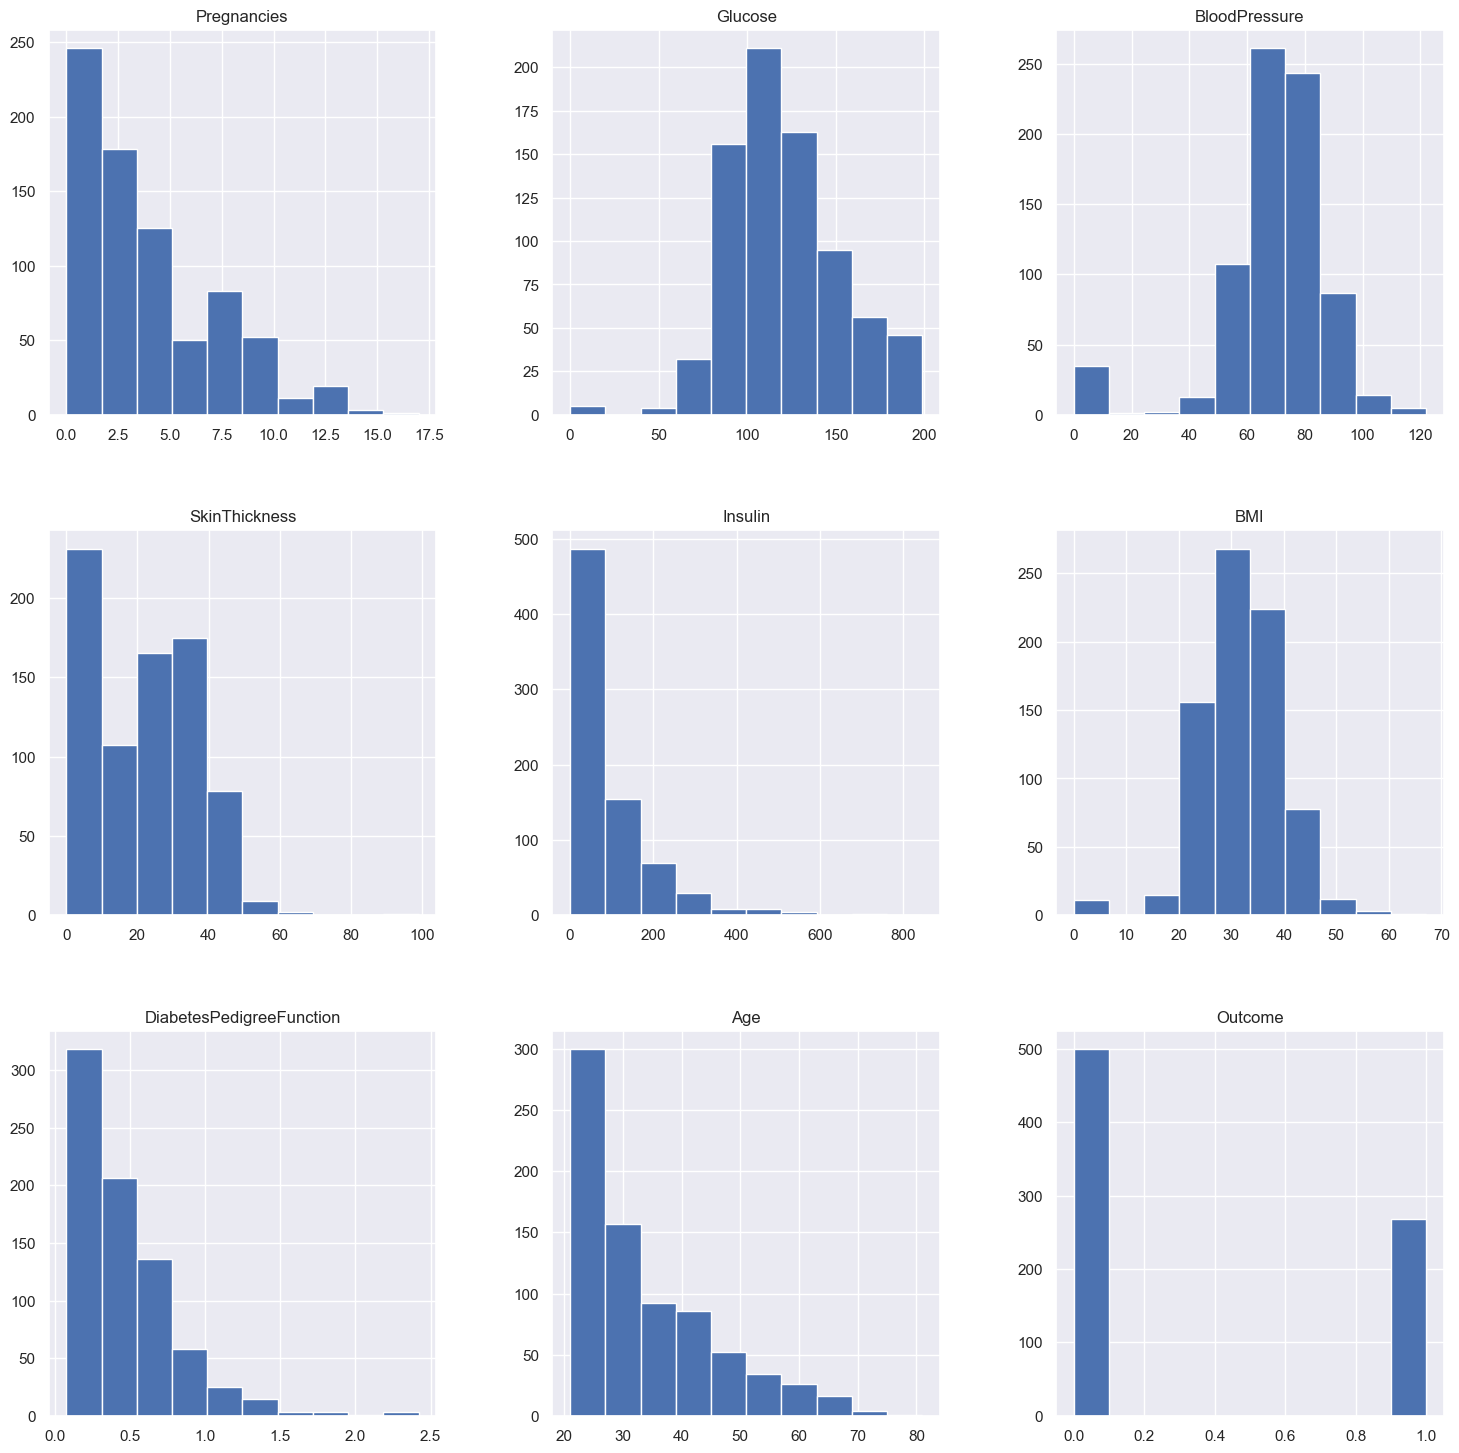

In [8]:
fig=df.hist(figsize=(18,18))

In [9]:
df_num = df.drop(["Outcome"],axis=1)
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


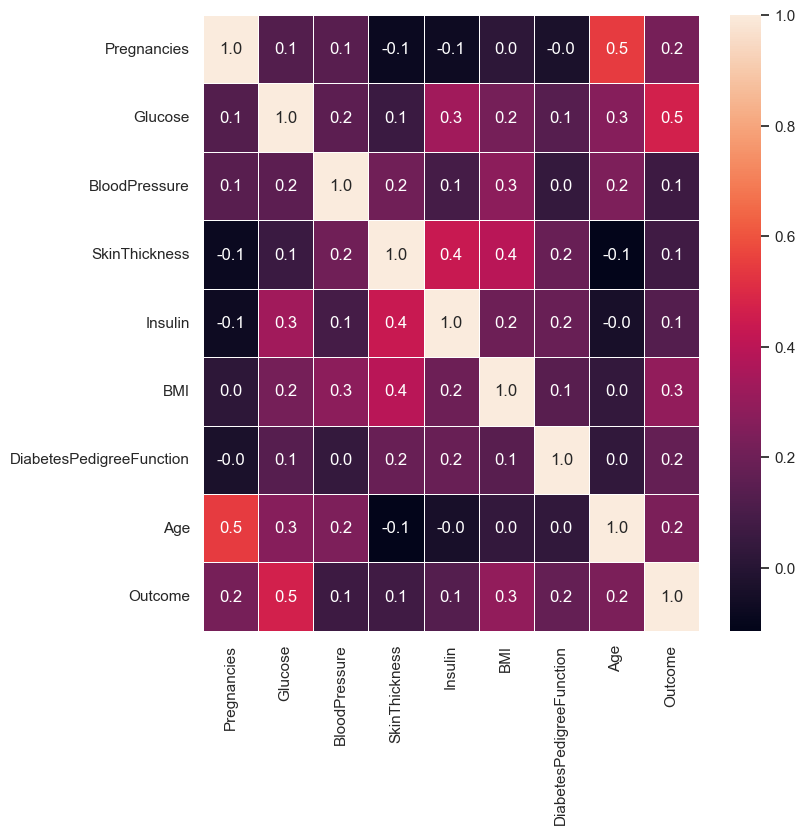

In [10]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True,fmt=".1f",linewidths=0.5,ax=ax)
plt.show()

## Ensemble Learning

**1) Random Forest**

In [11]:
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

print("X_train shape is:",X_train.shape)
print("X_test shape is:",X_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

X_train shape is: (537, 8)
X_test shape is: (231, 8)
y_train shape is: (537,)
y_test shape is: (231,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clas=RandomForestClassifier(n_estimators=100, random_state=10)
rf = rf_clas.fit(X_train,y_train)
rf

RandomForestClassifier(random_state=10)

In [14]:
y_pred = rf.predict(X_test)

Calculating accuracies

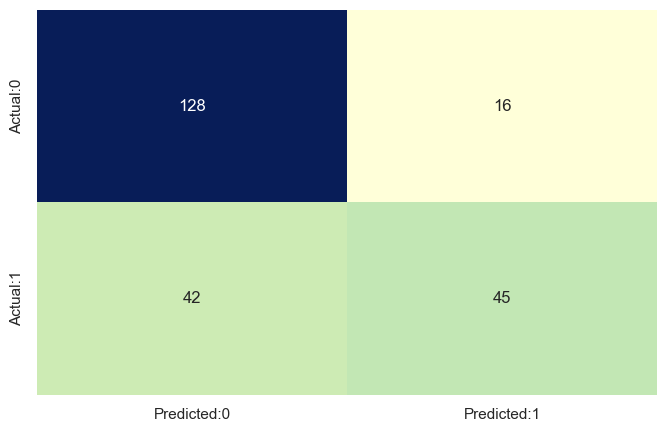

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0","Predicted:1"], index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.show()

In [16]:
# Seggregating True positive, negative and False positive and negative

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [17]:
from sklearn.metrics import classification_report

results = classification_report(y_test,y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       144
           1       0.74      0.52      0.61        87

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



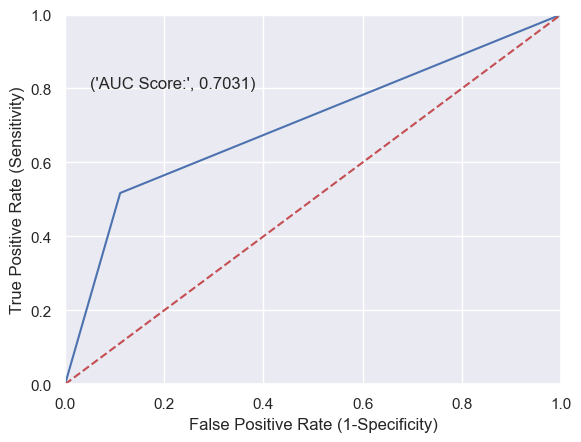

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],"r--")

plt.text(x=0.05,y=0.8, s=("AUC Score:", round(roc_auc_score(y_test,y_pred),4)))

plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

plt.grid(True)

In [19]:
from sklearn import metrics

cols = ["Model","AUC Score","Precision Score","Recall Score","Accuracy Score","f1-Score"]

result_tabulation = pd.DataFrame(columns=cols)

rf_metrics = pd.Series({"Model":"Random Forest",
                       "AUC Score":metrics.roc_auc_score(y_test,y_pred),
                       "Precision Score":metrics.precision_score(y_test,y_pred),
                       "Recall Score":metrics.recall_score(y_test,y_pred),
                       "Accuracy Score":metrics.accuracy_score(y_test,y_pred),
                       "f1-Score":metrics.f1_score(y_test,y_pred)})

result_tabulation = result_tabulation._append(rf_metrics, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,Random Forest,0.703065,0.737705,0.517241,0.748918,0.608108


**2) Bagging Meta Estimator**

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

meta_estimator.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=10))

In [21]:
y_pred = meta_estimator.predict(X_test)

Claculating accuracies

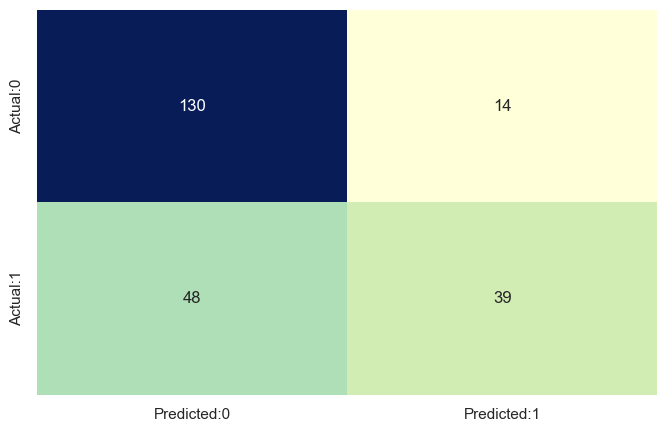

In [22]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"], index=["Actual:0","Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.show()

In [23]:
# Seggregating True positive, negative and False positive and negative

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [24]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       144
           1       0.74      0.45      0.56        87

    accuracy                           0.73       231
   macro avg       0.73      0.68      0.68       231
weighted avg       0.73      0.73      0.71       231



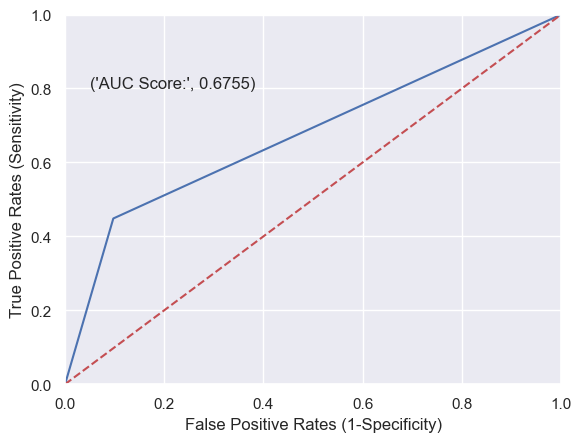

In [25]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],"r--")

plt.text(x=0.05,y=0.8,s=("AUC Score:",round(roc_auc_score(y_test,y_pred),4)))

plt.xlabel("False Positive Rates (1-Specificity)")
plt.ylabel("True Positive Rates (Sensitivity)")

plt.grid(True)

In [26]:
rf_metrics = pd.Series({"Model":"Meta Estimator",
                       "AUC Score":metrics.roc_auc_score(y_test,y_pred),
                       "Precision Score":metrics.precision_score(y_test,y_pred),
                       "Recall Score":metrics.recall_score(y_test,y_pred),
                       "Accuracy Score":metrics.accuracy_score(y_test,y_pred),
                       "f1-Score":metrics.f1_score(y_test,y_pred)})

result_tabulation = result_tabulation._append(rf_metrics, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,Random Forest,0.703065,0.737705,0.517241,0.748918,0.608108
1,Meta Estimator,0.675527,0.735849,0.448276,0.731602,0.557143


**3) Ada Boost**

In [27]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=10)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [28]:
y_pred = adaboost.predict(X_test)

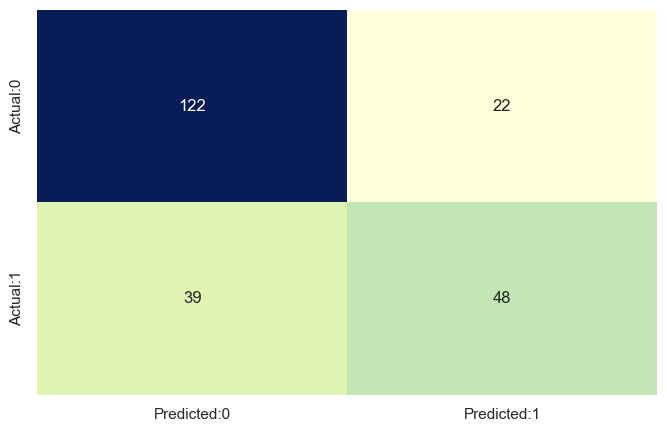

In [29]:
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.show()

In [30]:
# Seggregating True positive, negative and False positive and negative

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [31]:
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       144
           1       0.69      0.55      0.61        87

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



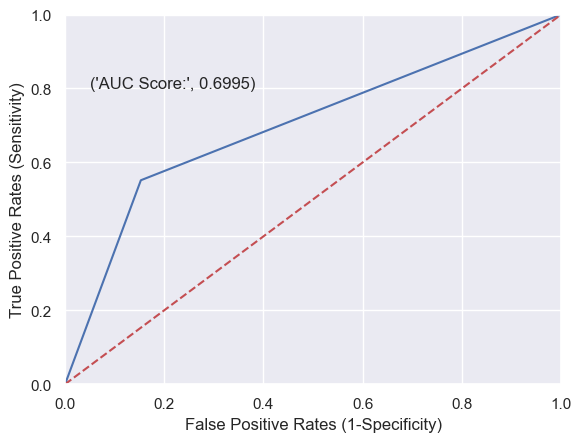

In [32]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],"r--")

plt.text(x=0.05,y=0.8,s=("AUC Score:",round(roc_auc_score(y_test,y_pred),4)))

plt.xlabel("False Positive Rates (1-Specificity)")
plt.ylabel("True Positive Rates (Sensitivity)")

plt.grid(True)

In [33]:
rf_metrics = pd.Series({"Model":"AdaBoost",
                       "AUC Score":metrics.roc_auc_score(y_test,y_pred),
                       "Precision Score":metrics.precision_score(y_test,y_pred),
                       "Recall Score":metrics.recall_score(y_test,y_pred),
                       "Accuracy Score":metrics.accuracy_score(y_test,y_pred),
                       "f1-Score":metrics.f1_score(y_test,y_pred)})

result_tabulation = result_tabulation._append(rf_metrics, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,Random Forest,0.703065,0.737705,0.517241,0.748918,0.608108
1,Meta Estimator,0.675527,0.735849,0.448276,0.731602,0.557143
2,AdaBoost,0.699473,0.685714,0.551724,0.735931,0.611465


**4) XGBM**

In [34]:
from xgboost.sklearn import XGBClassifier

xgbm = XGBClassifier(random_state=1, learning_rate=0.01)

xgbm.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [35]:
y_pred = xgbm.predict(X_test)

Calculating accuracies

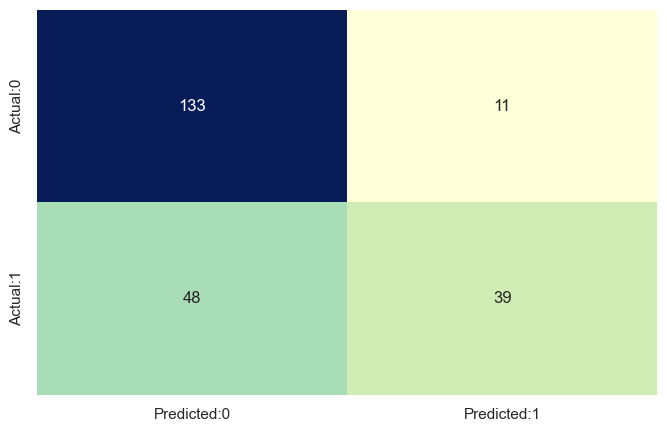

In [36]:
cm=confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"], index=["Actual:0","Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.show()

In [37]:
# Seggregating True positive, negative and False positive and negative

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [38]:
result = classification_report(y_test,y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.73      0.92      0.82       144
           1       0.78      0.45      0.57        87

    accuracy                           0.74       231
   macro avg       0.76      0.69      0.69       231
weighted avg       0.75      0.74      0.72       231



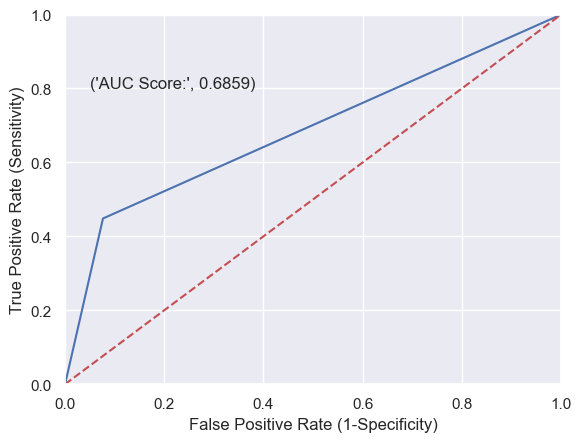

In [39]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],"r--")

plt.text(x=0.05,y=0.8,s=("AUC Score:",round(roc_auc_score(y_test,y_pred),4)))

plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

plt.grid(True)

In [40]:
rf_metrics = pd.Series({"Model":"XGB Classifier",
                       "AUC Score":metrics.roc_auc_score(y_test,y_pred),
                       "Precision Score":metrics.precision_score(y_test,y_pred),
                       "Recall Score":metrics.recall_score(y_test,y_pred),
                       "Accuracy Score":metrics.accuracy_score(y_test,y_pred),
                       "f1-Score":metrics.f1_score(y_test,y_pred)})

result_tabulation = result_tabulation._append(rf_metrics, ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,Random Forest,0.703065,0.737705,0.517241,0.748918,0.608108
1,Meta Estimator,0.675527,0.735849,0.448276,0.731602,0.557143
2,AdaBoost,0.699473,0.685714,0.551724,0.735931,0.611465
3,XGB Classifier,0.685943,0.780000,0.448276,0.744589,0.569343


**Model Comparison**

In [41]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-Score
0,Random Forest,0.703065,0.737705,0.517241,0.748918,0.608108
1,Meta Estimator,0.675527,0.735849,0.448276,0.731602,0.557143
2,AdaBoost,0.699473,0.685714,0.551724,0.735931,0.611465
3,XGB Classifier,0.685943,0.780000,0.448276,0.744589,0.569343


Accuracy of Random Forest is better

Here adboost is better bcoz type 2 error is minimum... That is Actual 1 and predicted 0 

So accuracy of AdaBoost is Better